In [1]:
import math
import numpy as np
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def factorial(n):
    prod = 1
    for i in range(1, n + 1, 1):
        prod *= i
    return prod

def choose(n, r):
    num, den = factorial(n), factorial(r)*factorial(n - r)
    return num/den

def perm(n, r):
    num, den = factorial(n), factorial(n - r)
    return num/den

def binomial(x, n, p):
    return choose(n, x)*(p**x)*(1 - p)**(n - x)

def nbinomial(x, k, p): # Negative Binomial
    return choose(x - 1, k - 1)*p**k*(1 - p)**(x - k)

def poisson(x, Lambda):
    num, den = np.exp(-Lambda)*Lambda**x, factorial(x)
    return num/den

def derivative(function, x):
    h = 0.000000000001
    numerator, denominator = function(x + h) - function(x), h
    return numerator/denominator

# Question 1

In [22]:
month = [i for i in range(1, 11)]
quantity = [180, 590, 430, 550, 275, 720, 660, 790, 700, 810]
price = [475, 400, 450, 550, 575, 375, 375, 450, 400, 500]
df = pd.DataFrame(np.stack([month, quantity, price], axis = 1), columns = ['Month', 'Quantity', 'Price'])
df.set_index('Month')

,Quantity,Price
Month,,
1,180,475
2,590,400
3,430,450
4,550,550
5,275,575
6,720,375
7,660,375
8,790,450
9,700,400


## Part A
Let $ y $ be the quantity and $ x $ be the price. Plot the graph first.

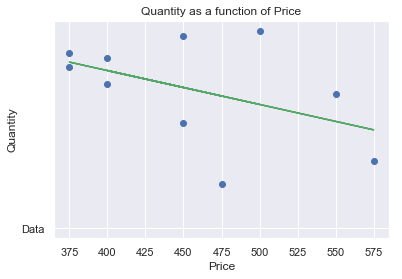

In [14]:
b1, b0 = np.polyfit(price, quantity, 1)
y = lambda xi: b1*xi + b0
plt.plot(price, quantity, 'o', 'Data')
plt.plot(price, y(np.array(price)), label = 'Predicted')
plt.xlim(min(price) - 10, max(price) + 10)
plt.ylabel('Quantity')
plt.xlabel('Price')
plt.title('Quantity as a function of Price')
plt.show()

In [17]:
print('Number of tissue papers at a price of GHS 600 =', round(y(600)))
print('Number of tissue papers at a price of GHS 515 =', round(y(515)))

Number of tissue papers at a price of GHS 600 = 369.0
Number of tissue papers at a price of GHS 515 = 487.0


## Part B
Let $ y $ be the number of tissue papers and $ x $ be the time in months. Plot the graph first.

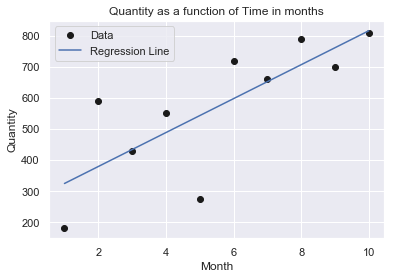

In [21]:
b1, b0 = np.polyfit(month, quantity, 1)
g = lambda xi: b1*xi + b0
plt.plot(month, quantity, 'ko', label = 'Data')
plt.plot(month, g(np.array(month)), label = 'Regression Line')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Quantity as a function of Time in months')
plt.legend()
plt.show()

In [24]:
print('Number of tissue papers that will be bought in the 11th month =', round(g(11)))

Number of tissue papers that will be bought in the 11th month = 871.0


## Part C
We kinda already have answered the 11th month. For the 12th month, the answer is the following.

In [25]:
print('Number of tissue papers that will be bought in the 12th month =', round(g(12)))

Number of tissue papers that will be bought in the 12th month = 926.0
